# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd

## Load the Data

In [2]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

In [7]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [8]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           52000.000000            5.200000e+04  52000.000000   
mean           440284.256846            2.998617e+05     -1.427193   
std             95109.751221            1.613624e+05      1.398249   
min             98480.000000            1.903000e+04     -6.895268   
25%            375540.000000            1.780100e+05     -2.366190   
50%            440950.000000            2.671800e+05     -1.391202   
75%            523500.000000            3.981492e+05     -0.214666   
max            654960.000000            1.203900e+06      1.753632   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  52000.000000  52000.000000       51678.000000        52000.000000   
mean      52.586684     30.401712           2.837145            1.834327   
std        1.453049     25.545581           0.402582            0.727856   
min       50.026153      1.000000        

In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values Analysis:")
print(missing_values)


Missing Values Analysis:
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control     

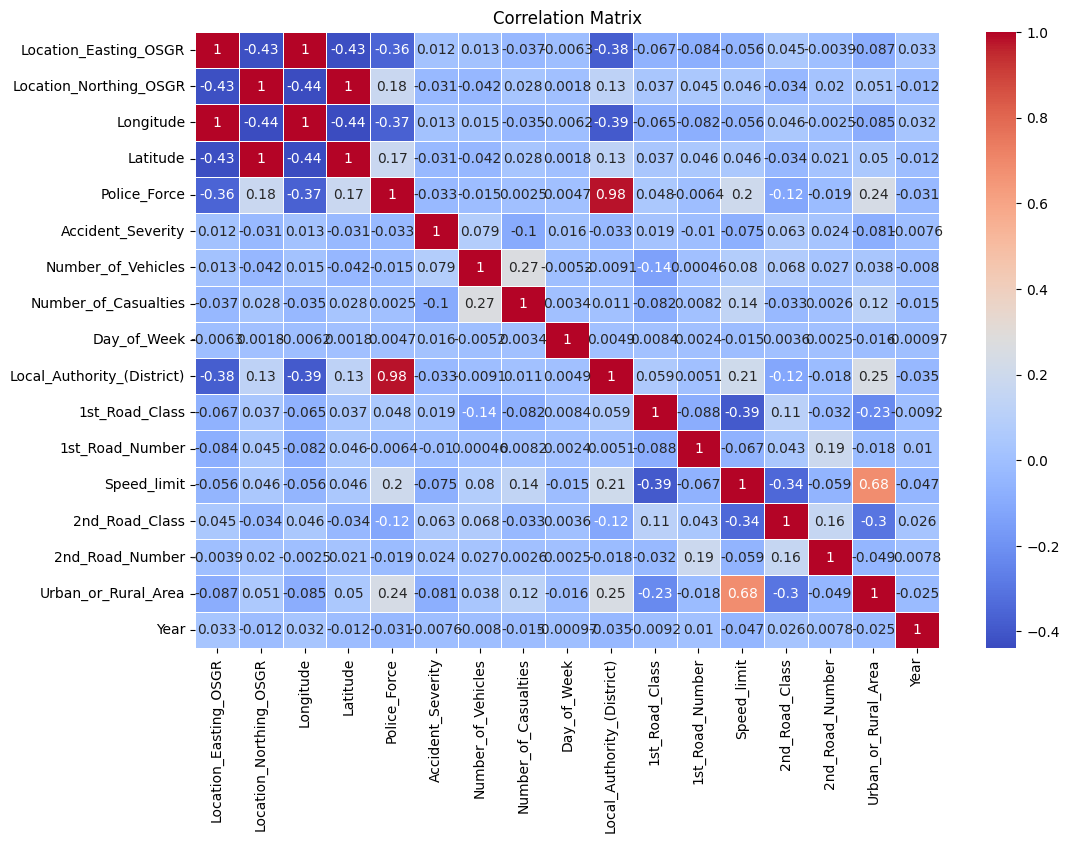

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')


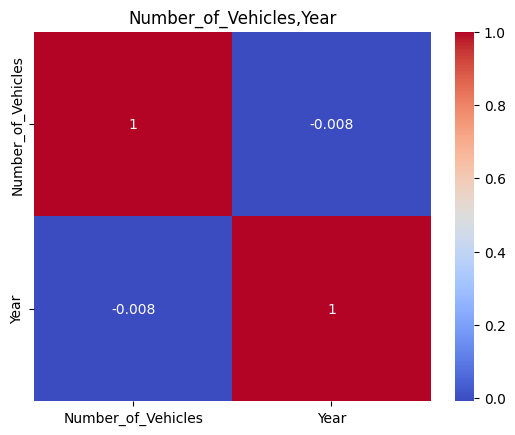

In [9]:
print(df.columns)


correlation = df[['Number_of_Vehicles','Year']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Number_of_Vehicles,Year')
plt.show()


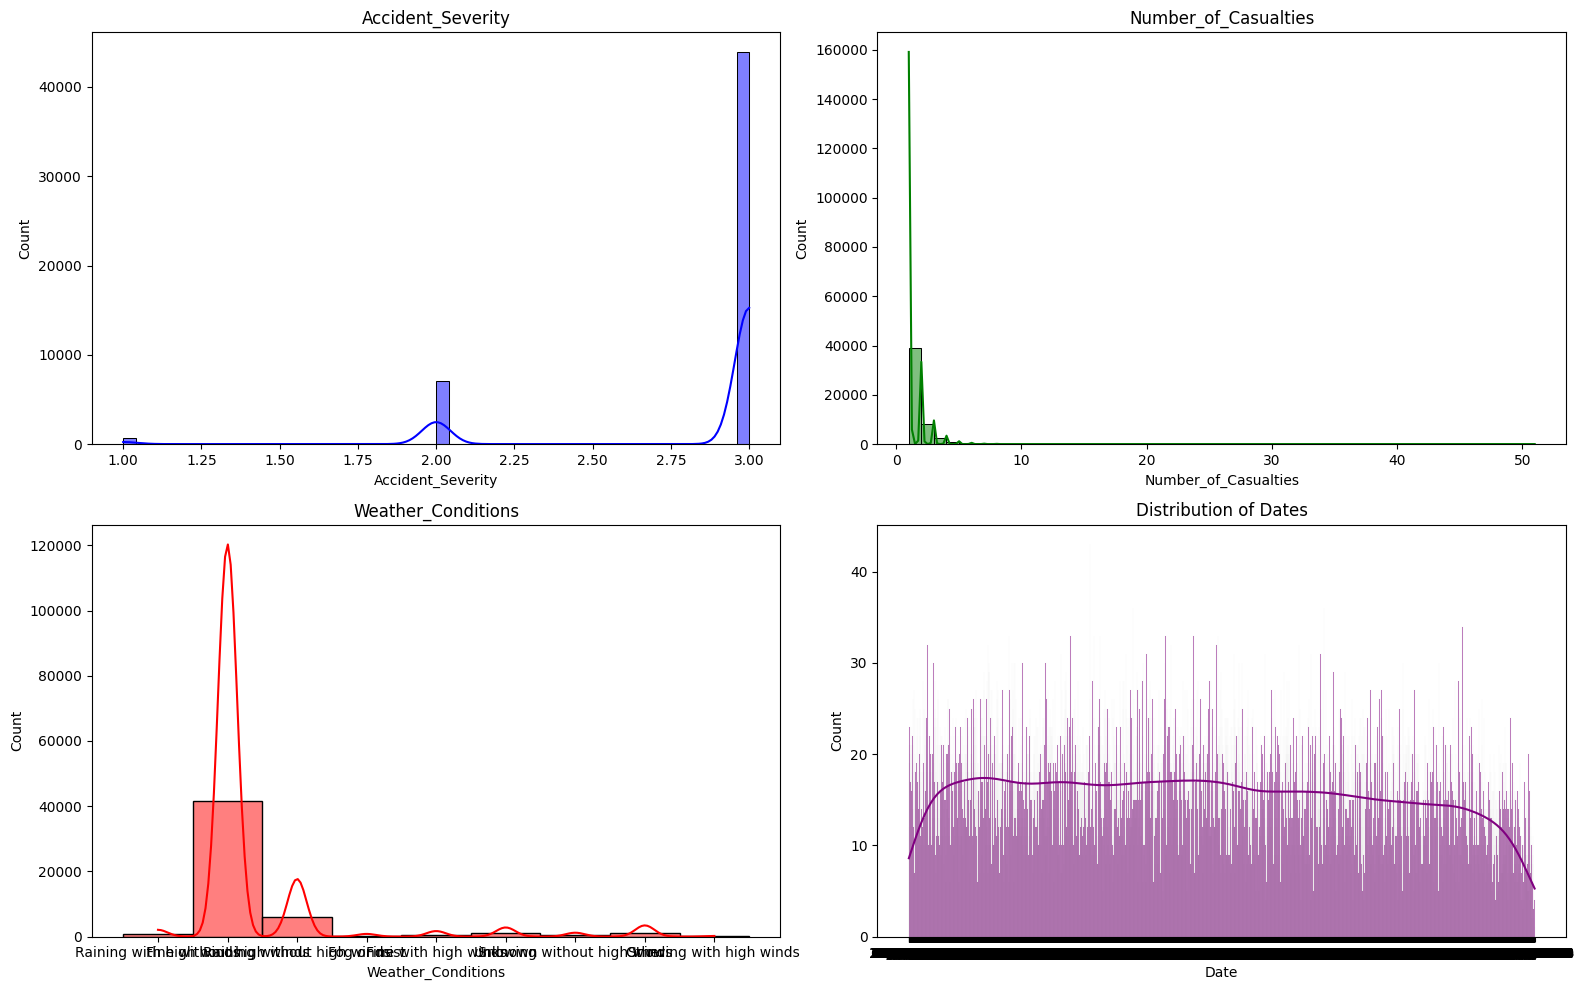

In [14]:

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Accident_Severity'], bins=50, color='blue', kde=True)
plt.title('Accident_Severity')

plt.subplot(2, 2, 2)
sns.histplot(df['Number_of_Casualties'], bins=50, color='green', kde=True)
plt.title('Number_of_Casualties')

plt.subplot(2, 2, 3)
sns.histplot(df['Weather_Conditions'], bins=50, color='red', kde=True)
plt.title('Weather_Conditions')

plt.subplot(2, 2, 4)
sns.histplot(df['Date'], bins=50, color='purple', kde=True)
plt.title('Distribution of Dates')

plt.tight_layout()
plt.show()

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [15]:
df_numeric = df.select_dtypes(include=[np.number])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_no_outliers_iqr = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

original_shape = df.shape[0]
new_shape = data_no_outliers_iqr.shape[0]

print("before:", original_shape)
print("after:", new_shape)


before: 52000
after: 21329


In [16]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')


df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)


df_imputed = df.copy()
df_imputed[df_numeric.columns] = df_numeric_imputed



print(df_imputed.isnull().sum())

Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Fa

In [17]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric_imputed), columns=df_numeric_imputed.columns)



print(df_scaled.describe())

       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           5.200000e+04            5.200000e+04  5.200000e+04   
mean            2.989745e-16           -7.863795e-17  3.375078e-17   
std             1.000010e+00            1.000010e+00  1.000010e+00   
min            -3.593822e+00           -1.740395e+00 -3.910695e+00   
25%            -6.807386e-01           -7.551502e-01 -6.715581e-01   
50%             6.999803e-03           -2.025377e-01  2.574029e-02   
75%             8.749528e-01            6.091168e-01  8.671832e-01   
max             2.257159e+00            5.602589e+00  2.274884e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  5.200000e+04  5.200000e+04       5.200000e+04        5.200000e+04   
mean  -2.979087e-15  5.014792e-17      -2.317462e-16        5.984956e-17   
std    1.000010e+00  1.000010e+00       1.000010e+00        1.000010e+00   
min   -1.762194e+00 -1.150962e+00      -4.577838e+00       -1.146

In [18]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_scaled)


df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)


print(df_pca.head())

[0.20144472 0.13047226]
        PC1       PC2
0 -0.732280  3.497879
1 -2.432882 -0.776429
2  1.279490 -0.996032
3  0.323353 -2.466868
4  0.293175 -1.079341


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
#KMeans

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [19]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.9)


df_pca = pca.fit_transform(df_scaled)


print(pca.n_components_)


print(pca.explained_variance_ratio_)


df_pca = pd.DataFrame(df_pca)

print(df_pca.head())

11
[0.20144472 0.13047294 0.09517681 0.078254   0.06812778 0.06121483
 0.05890247 0.05871732 0.05809567 0.04833372 0.04600282]
         0         1         2         3         4         5         6   \
0 -0.732272  3.497778 -0.944506 -1.192976 -0.945240 -0.836684  0.347890   
1 -2.432881 -0.776471  0.214012  0.047059  0.310082 -0.081058 -0.056843   
2  1.279485 -0.989971 -2.686427  1.679164 -0.362965 -0.468962 -1.092529   
3  0.323355 -2.465057  0.540392 -0.584803  1.012887 -0.366639 -1.120560   
4  0.293177 -1.079531  0.132402 -0.502622  1.227964  0.409215  0.349882   

         7         8         9         10  
0  0.883029  0.357460 -0.162513  0.254876  
1 -1.695207 -0.459362 -0.314765 -0.471354  
2 -0.291826  1.114207 -1.474117  1.640662  
3  1.463681  0.146946 -0.704337  0.734557  
4 -0.425488 -1.258611  0.639814  1.497369  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


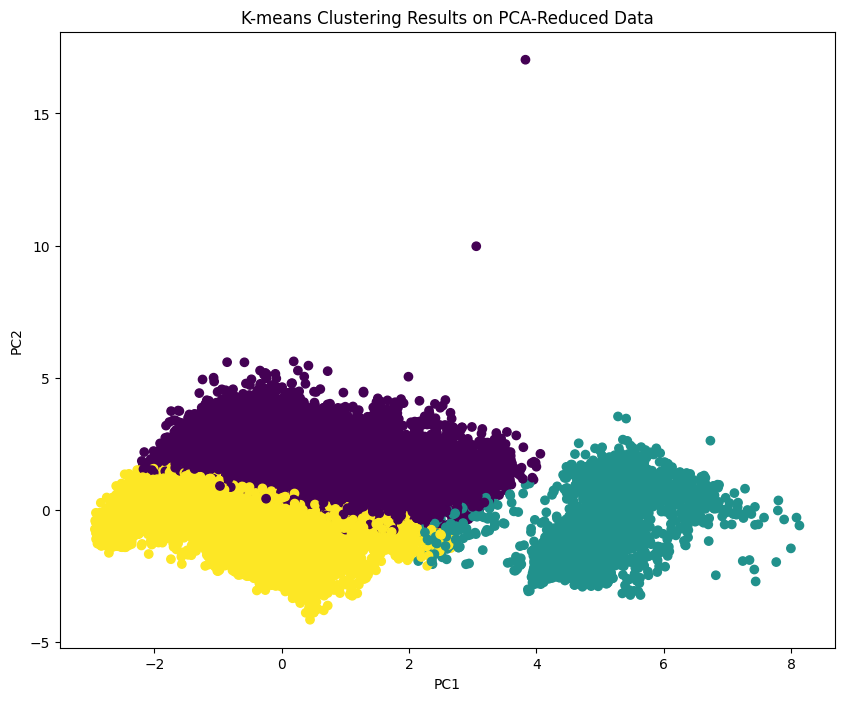

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_scaled)


num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_pca)


labels = kmeans.predict(df_pca)


df_pca_labeled = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca_labeled['Cluster'] = labels


plt.figure(figsize=(10, 8))
plt.scatter(df_pca_labeled['PC1'], df_pca_labeled['PC2'], c=df_pca_labeled['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results on PCA-Reduced Data')
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

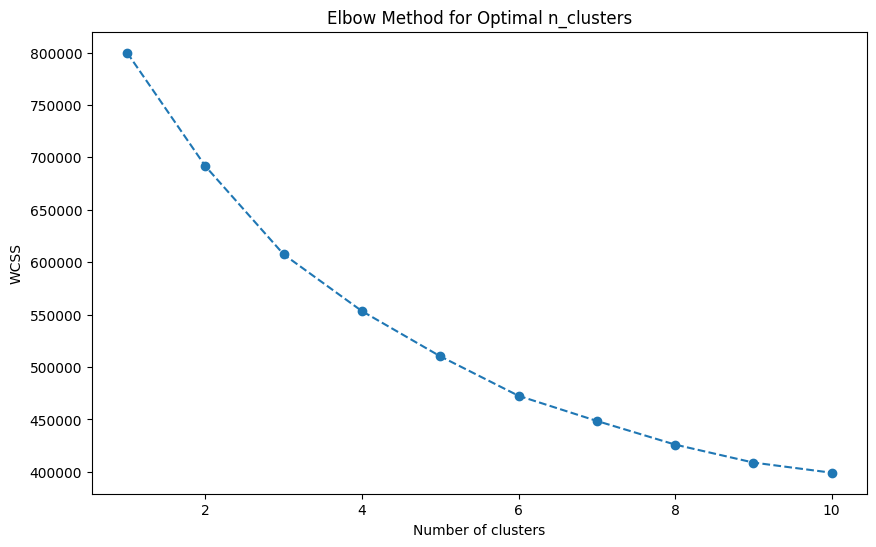

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Cluster
0,-0.732272,3.497778,-0.944506,-1.192976,-0.945240,-0.836684,0.347890,0.883029,0.357460,-0.162513,0.254876,0
1,-2.432881,-0.776471,0.214012,0.047059,0.310082,-0.081058,-0.056843,-1.695207,-0.459362,-0.314765,-0.471354,2
2,1.279485,-0.989971,-2.686427,1.679164,-0.362965,-0.468962,-1.092529,-0.291826,1.114207,-1.474117,1.640662,2
3,0.323355,-2.465057,0.540392,-0.584803,1.012887,-0.366639,-1.120560,1.463681,0.146946,-0.704337,0.734557,2
4,0.293177,-1.079531,0.132402,-0.502622,1.227964,0.409215,0.349882,-0.425488,-1.258611,0.639814,1.497369,2


In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


optimal_clusters = 3


kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_pca)

labels = kmeans.predict(df_pca)


df_pca_labeled = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
df_pca_labeled['Cluster'] = labels


df_pca_labeled.head()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


silhouette_avg = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


davies_bouldin_avg = davies_bouldin_score(df_pca, labels)
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")


Silhouette Score: 0.1734
Davies-Bouldin Index: 1.9496


## Plot the data points with their predicted cluster center

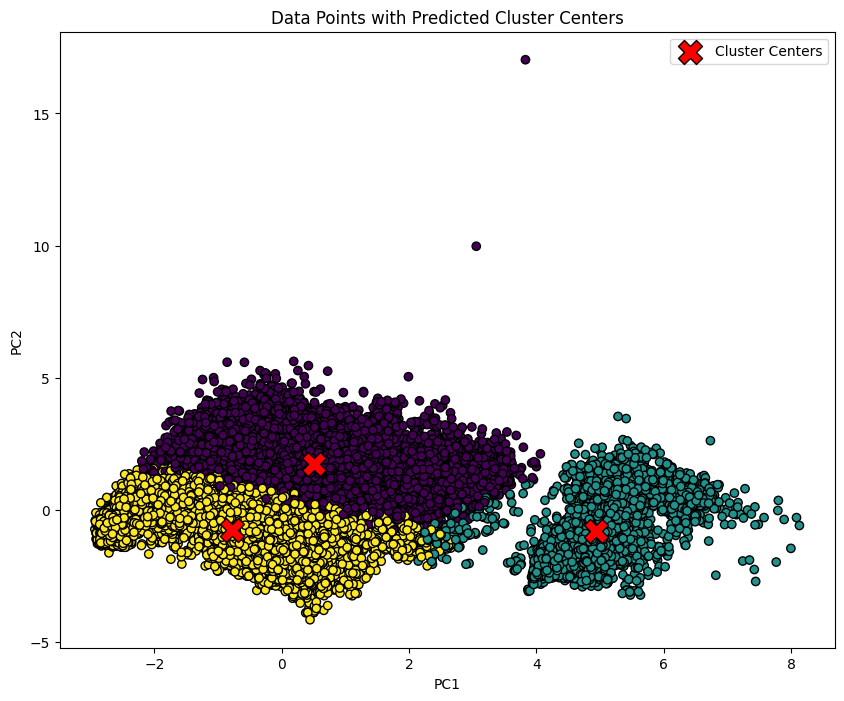

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')


cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Cluster Centers')


plt.title('Data Points with Predicted Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
   ----------------------------------------------

##   my ans:

   I chose this feature because it is easy and effective.

I defined the groups according to their connection and their impact on each other.

I was not able to complete the questions and the rest of the codes well due to the lack of time.

I hope to adjust the time or reduce the tasks or make them homework.

Thank you.